# Homework 3: Random Variables and Their Distributions
***

**Name**: 

***

This assignment is due on Moodle by **5pm on Friday March 2nd**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.  For a refresher on the course **Collaboration Policy** click [here](https://github.com/dblarremore/csci3022/blob/master/resources/syllabus.md#collaboration-policy).  

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 

### Work only 4 of the 5 problems below! Your choice.

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy.special import binom
import math
%matplotlib inline

### [25 points] Problem 1
***

Let $X$ be the lifespan (in years) of a BF Otterich Rugged Trail T/A tire under normal driving conditions, and suppose $X$ is described by the following probability density function: 

$$
f(x) = \left\{ 
\begin{array}{ll}
\dfrac{15}{c x^3} & 1 \leq x \leq 15 \\
0 & \textrm{otherwise}
\end{array}
\right.
$$

**Part A**: Determine the value of $c$ such that $f(x)$ is a valid PDF. 

**Part B**: Compute the cumulative distribution function $F(y)$ for $X$. 

**Part C**: Use the cdf you computed in **Part B** to find the probability that a single tire goes longer than 5 years without failing. 

**Part D**: Use the cdf you computed in **Part B** to determine the number of years within which $62.5\%$ of all tires will need to be replaced. In other words, determine the 62.5th percentile of the distribution of $X$. 

**Part E**: What is the probability that all four BF Otterich Rugged Trail T/A tires on a vehicle last longer than 5 years without failing? 

### [25 points] Problem 2
***

You are a data-driven transportation engineer investigating the effect that a particular [vertical lift bridge](https://en.wikipedia.org/wiki/Vertical-lift_bridge) has on city traffic.  Every time a boat passes under the bridge, cars must stop while the bridge is raised to accommodate the height of the boat.  As both boat and car traffic increases, city planners are considering building a new taller bridge that will never impede the flow of traffic. As part of a larger simulation of traffic congestion, you need to decide how to model the arrival of boats at the bridge.  From your Intro to Data Science class you remember that the time _between_ independent arrivals are usually modeled by an Exponential distribution.  Finally, you have access to a report that says on average 10 boats cross under the bridge per day.

Answer the following questions about this scenario. **Note** that for **Parts B-D** you should clearly express the computation you're doing with math, but feel free to do any fancy function evaluations with Python. 

**Part A**:  Assuming the between-boat times do in-fact follow $Exp(10)$, what distribution would you expect the **number** of boats that cross under the bridge on a given day to follow?  What are the parameter(s) of the distribution? 

The actual number of boats that pass through would follow the Poisson distribution, which would use 10 as the average number in a time frame, and then it would take parameter x, which is the number of events we want to find the probability for. The exponential distribution describes the time between events in a poisson distribution.

**Part B**:  What is the probability that 13 boats cross under the bridge on a particular day?

$P(x) = e^{-10}\times\frac{10^x}{x!} = e^{-10}\times\frac{10^{13}}{13!} = 0.07290$

**Part C**:  What is the probability that 8 boats or fewer cross under the bridge on a particular day?

To do this, i will integrate to PDF of a poisson distribution over the integral 0 to 8. The code was me trying to do it numerically.

In [478]:
def pShips(n, mean):
    return (math.exp(-mean)*((mean**n)/(math.factorial(n))))

In [479]:
pr = 0
#sum the probabilities for 0-8 ships
for i in range(9):
    pr+=pShips(i, 10)

The integral comes out to about 0.27

**Part D**: What is the probability that between 2 and 4 hours pass between two boat crossings? 

In [480]:
#exponential probability of value with exp(rate)
def exp(rate, x):
    return rate*math.exp(-1*rate*x)

In [481]:
#cumulative
def cumul(rate, x):
    return (1-math.exp(-1*rate*x))

In [482]:
#using 24/10 as hourly rate
a = cumul(24/10, 4) - cumul(24/10, 2)#prob that the time between events falls in this range
print(1-a)#1-a is the probability that no boat comes in this time range

0.9918379816874708


The chance that the time between boat crossings is between 2-4 hours is 0.99183

**Part F**: Write a function boat_count that takes as its sole argument the rate parameter $\lambda$ with units boats per day. Your function should simulate boat arrivals at the bridge by sampling between-boat times from $Exp(\lambda)$ via Numpy's [random.exponential](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.exponential.html) function and return the number of boats that pass under the bridge on a single simulated day. 

**Note**: Do not change the API for this function. In other words, please keep the name of the function, its input parameter, and its desired output the same. Of course, the inner workings of this function and the actual value that it returns are in your hands!

In [483]:
#so this takes beta which is 1/rate
def boat_count(lam):
    beta = 1/lam
    time = 0
    boats = 0
    while(time<1):#simulate boat arrivals until a day has passed
        time+=np.random.exponential(beta)
        boats+=1
    return boats

In [484]:
boat_count(10)

10

**Part G**: Write a function boat_count_sim that takes as arguments the rate parameter $\lambda$ with units boats per day and an integer number of days to simulate. Your function should use the function you wrote in **Part F** to simulate many independent days of boat crossings and estimate the probability that 8 boats or fewer cross under the bridge on a particular day. For $\lambda = 10$, does your estimate agree with the by-hand computation you did in **Part C**?  

**Note**: Do not change the API for this function. 

In [485]:
def boat_count_sim(lam, num_days=int(1e3)):
    countPerDay = []
    #simulate days
    for i in range(num_days+1):
        countPerDay.append(boat_count(lam))
    #times there were 8 or less
    eightOrLess = 0
    for i in countPerDay:
        if(i<=8):
            eightOrLess+=1
    return eightOrLess/num_days

In [489]:
boat_count_sim(10, 10000)

0.2247

This value is pretty close to my caluclated value, but is a lower enough that it is significant and noteworthy.

**Part H**: Write a function boat_time_sim that takes as arguments the rate parameter $\lambda$ with units boats per day and an integer number of boat arrivals to simulate. Your function should sample boat arrivals via [np.random.exponential](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.exponential.html) and estimate the probability that boats arrive between 2 and 4 hours apart.  For $\lambda = 10$, does your estimate agree with the by-hand computation you did in **Part D**?  

**Note**: Do not change the API for this function.  

In [487]:
def boat_time_sim(lam, num_boats=int(1e3)):
    beta = 1/lam#param for exp
    times = []
    #do sims
    interval_count = 0
    for x in range(num_boats + 1):
        t = np.random.exponential(beta)
        times.append(t)
        if(t<=(4/24) and t>=(2/24)):#if it is between 2 and 4 hours
            interval_count+=1
    return interval_count/num_boats

In [492]:
boat_time_sim(10, 1000)

0.235

### [25 points] Problem 3 
***

Let $X =$ the leading digit of a randomly selected number from a large accounting
ledger. For example, if we randomly draw the number \$20,695, then $X = 2.$
People who make up numbers to commit accounting fraud tend to give $X$ a
(discrete) uniform distribution, i.e., $P(X = x) = \frac{1}{9}$, for $x \in \{1, ..., 9\}$. However,
there is empirical evidence that suggests that _naturally occurring_ numbers (e.g.,
numbers in a non-fraudulent accounting ledgers) have leading digits that do not
follow a uniform distribution. Instead, they follow a distribution defined by the following probability mass function:

$$
f(x) = \log_{10}\left( \frac{x+1}{x} \right) \quad \textrm{for } x = 1, 2, \ldots, 9
$$

**Part A**: Write a function pmf_natural that implements $f(x)$. Your function should take in an integer $x$ and return $f(x) = P(X = x)$.  Use your function to argue that $f(x)$ is a well-defined probability mass function. 

In [2]:
def pmf_natural(x):
    r = np.log10((x+1)/(x))
    return r 

In [13]:
sum=0
for i in range(1, 10):
    sum+=pmf_natural(i)
    print("P("+str(i)+") = "+str(pmf_natural(i)))
print(sum)

P(1) = 0.301029995664
P(2) = 0.176091259056
P(3) = 0.124938736608
P(4) = 0.0969100130081
P(5) = 0.0791812460476
P(6) = 0.0669467896306
P(7) = 0.0579919469777
P(8) = 0.0511525224474
P(9) = 0.0457574905607
1.0


The code above shows that this is a valid PMF, because the values in the range are above zero for the given support, and they sum to 1.

**Part B**: Use the function you wrote above to make stacked bar plots describing the pmf of the naturally occurring numbers as well as the discrete uniform distribution.  Make sure that the $x$- and $y$-limits on your plots are the same so that the two distributions are easy to compare. 

In [16]:
pmf = []
for i in range(1,10):
    pmf.append(pmf_natural(i))

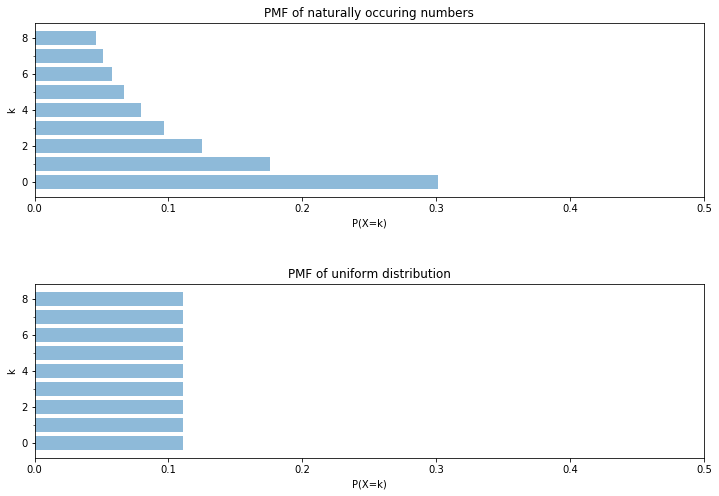

In [38]:
# Initialize figure subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12,8))

y_pos = np.arange(len(pmf))
axes[0].barh(y_pos, pmf, align='center', alpha=0.5)
axes[0].set_yticks(y_pos, range(1,10))
axes[0].set_xlabel('P(X=k)')
axes[0].set_ylabel('k')
axes[0].set_xlim([0,0.5])
axes[0].set_title('PMF of naturally occuring numbers')

y_pos = np.arange(len(pmf))
axes[1].barh(y_pos, 1/9, align='center', alpha=0.5)
axes[1].set_yticks(y_pos, range(1,10))
axes[1].set_xlabel('P(X=k)')
axes[1].set_ylabel('k')
axes[1].set_xlim([0,0.5])
axes[1].set_title('PMF of uniform distribution')

# Adjust vertical space so titles/axis labels don't overlap 
fig.subplots_adjust(hspace=.5)

**Part C**: Write a function cdf_natural that implements the cumulative distribution function $F(y)$ for $X$ and use it to compute the probability that the leading digit in a number is at most 4 and at most 5. 

In [52]:
#basically just sum the probabilities of each val in the support
#since it is a discrete distribution
def cdf_natural(y):
    p = 0
    for i in range(1,y+1):
        p+=pmf_natural(i)
    return p

In [54]:
cdf_natural(4)

0.69897000433601886

The above example shows that the probability that the leading number is at most 4 (1,2,3, or 4), 0.69897. 

In [55]:
cdf_natural(5)

0.77815125038364363

The next example above shows that the probability that the number is at most 5 is 0.77815

**Part D**: The data in tax_data.txt contains the taxable income for individuals in 1978. Use Pandas and the information from **Parts A-D** to determine whether or not the dataset is likely fraudulent.  In addition to code and any graphical summaries, make sure to clearly justify your conclusion in words. 

Text(0.5,1,'PMF of dataset')

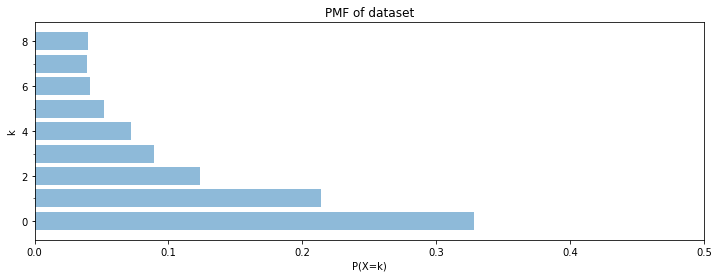

In [86]:
path = 'tax_data.txt'
df = pd.read_csv(path, delimiter='\t')#get the data

#drop where tax data is 0
df['Tax Incomes'].replace(0, np.nan, inplace=True)
df.dropna(subset=['Tax Incomes'], inplace=True)

#now make a column of first digits
df["first_digit"] = df["Tax Incomes"].apply(lambda s: int(str(s)[0]))#get first digit by casting to string and back to int

#now get count for each digit
#dis = df.groupby('first_digit').count()
dis = []
for i in range(1, 10):
    dis.append((df['first_digit'] == i).sum())

#now convert this to a list of probabilities
total = 0
for i in dis:
    total+=i
dis = [(n/total) for n in dis]

# Initialize figure subplots
fig, axes = plt.subplots(figsize=(12,4))

y_pos = np.arange(len(dis))
axes.barh(y_pos, dis, align='center', alpha=0.5)
axes.set_yticks(y_pos, range(1,10))
axes.set_xlabel('P(X=k)')
axes.set_ylabel('k')
axes.set_xlim([0,0.5])
axes.set_title('PMF of dataset')

The above plot matches the distribution for naturally occuring numbers, so it is likely a real dataset.

### [25 points] Problem 4
***

You are the team manager for the CU intramural Quidditch team, the Boulder Beaters, and you've just made it to the national championship series against the Stanford Snitching Snitches. The typical Quidditch championship is a best of 11 series, so the first team to win 6 matches is declared the winner.  Furthermore, based on a rigorous statistical analysis of regular season play, the probability that the Boulder Beaters win any one match against the Snitching Snitches is given by $p = 0.55$.  

**Part A**: What is the probability that you win the 11-game series on the 8th match played? 


In [237]:
def n_choose_k(n,k):
    return math.factorial(n)/(math.factorial(k)*math.factorial(n-k))

In [238]:
c = n_choose_k(8, 6)
p = c*(0.55**6)*(0.45**2)

In [239]:
print(p)

0.1569492323437501


The Boulder Beaters have a 0.1569 probability of winning the match on their 8th game. This was found by using a negative binomial distribution to find the event of 6 wins out of 8 games.

**Part B**: What is the probability that you win the 11-game series in any valid number of matches? 

In [240]:
#this function returns the probability of winning 6 games out of numGames with a win rate of 0.55
def series(numGames, p):
    return 0 if numGames<6 else n_choose_k((numGames-1), (6-1))*(p**6)*((1-p)**(numGames-6))

In [241]:
series(11, 0.55)

0.12871798917591798

There's 11 games, and you could win after 6, 7, 8, 9, 10, or 11. So, those are the values we are interested in.

In [242]:
#init possible games and probability 
probs = 0
for i in range(12):
    pp = series(i, 0.55)
    probs+=pp
    print("Probability of winning series after exactly {:d} games: ".format(i)+str(pp))
print("Probability of winning the series: "+str(probs))

Probability of winning series after exactly 0 games: 0
Probability of winning series after exactly 1 games: 0
Probability of winning series after exactly 2 games: 0
Probability of winning series after exactly 3 games: 0
Probability of winning series after exactly 4 games: 0
Probability of winning series after exactly 5 games: 0
Probability of winning series after exactly 6 games: 0.027680640625000013
Probability of winning series after exactly 7 games: 0.07473772968750002
Probability of winning series after exactly 8 games: 0.11771192425781253
Probability of winning series after exactly 9 games: 0.14125430910937503
Probability of winning series after exactly 10 games: 0.1430199879732422
Probability of winning series after exactly 11 games: 0.12871798917591798
Probability of winning the series: 0.6331225808288479


**Part C**: The winner of the champsionship will take home \$10,000 to use for equipment and victory parties in the following season. Because the stakes are so high, you've decided to hire a famous Quidditch consultant, Bludger Bob, to help you prepare for each match. With Bob's help your probability of winning any given match increases to $p = 0.7$.  Bludger Bob charges a fee of \$100 per game, but as a testament to his confidence in his abilities, only charges you the \$100 for games that you win and only if you win the series.  So, if you play a 11-game series and win you will take home \$10,000 less \$600 for Bludger Bob's fees, for a total payout of \$9,400.  What is the expected payout for an 11-game series?   

In [249]:
#sums the probabilities
def pWin(numGames, p):
    probs = 0
    for i in range(6, numGames+1):
        pp=series(i, p)
        probs+=pp
    return probs

In [250]:
print("The probability of winning an eleven game series under these conditions is {:f}".format(pWin(11, 0.7)))

The probability of winning an eleven game series under these conditions is 0.921775


In [245]:
#probability of winning multiplied by the payout if you win.
payout = pWin(11, 0.7) * 9400
print(payout)

8664.686964976


Wasn't really sure how to approach this, but i just multiplied the probability of winning with the money you get if you do win, so, if you were to participate in the 11 game series with the given stats, you could expect \$8664 per participation.

**Part D**: This year the National Intramural Quidditch Association (NIQA) is implementing an experimental rule.  As the team with the best record in the regular season you will get to choose the length of the championship series.  Specifically, you can choose the series length to be anywhere from $N=3, 5, 7, \ldots, 99$ games long.  Assuming that you plan to use Bludger Bob's services and considering the fact that you have a better than even chance of winning each game, explain the trade-offs between choosing a short series vs. a long series in terms of Expected Payout. 


If you were to use a long series, you're more likely to win since your win rate would converge towards the 0.7. However, Bob would take a larger cut since you'd have to win more games. If you use a shorter series, you're less likely to win since your win rate is more volatile with smaller sets, but bob would take a smaller cut since you need to win fewer games.

**Part E**: Write a function optimal_series that takes in $p$, the probability that your team wins an individual game, then computes the Expected Payout for each series of length $N=3, 5, 7, \ldots 99$ and returns the optimal series length.  In addition to returning the optimal series length, your function should also produce a plot of Expected Payout vs Series Length. You may write any additional helper functions that you like, but you should not change the API for the function optimal_series. 

In [367]:
#this function returns the probability of winning (numGames+1)/2 games out of numGames with a win rate of 0.55
def series2(numGames, p, winsRequired):
    nck = n_choose_k((numGames-1),(winsRequired-1))
    w = (p**winsRequired)
    l = (1-p)**(numGames-winsRequired)
    if(numGames<winsRequired):
        return 0
    else:
        return nck*w*l

In [368]:
series2(7, 0.7, 4)

0.12965400000000002

In [369]:
#Probability of winning the series of N games with win rate p
def pWin2(N, p):
    probs = 0
    winsRequired = (N+1)/2
    for i in range(int(winsRequired), N+1):
        pp=series2(i, p, winsRequired)#probability of winning after i game series after winsRequired games
        probs+=pp
    return probs

In [370]:
pWin2(11, 0.7)

0.92177520904

In [407]:
def optimal_series(p):
    #Create dictionary. Key is game length, value is payout
    series = {}
    for i in range(3, 101, 2):
        series[str(i)]=0

    #Update the payout value
    winnings = 0
    for key in series:
        winsRequired = (int(key)+1)/2
        winnings = 10000 - (winsRequired*100)
        pr = pWin2(int(key), p)
        net = winnings*pr
        series[key] = net#(total - (wins required * 100))*probability of winning 
        #print("Winnings for {:d} games is {:d} multiplied by probability {:3f} equals a net winnings of {:3f}".format(int(key), int(winnings), pr, net))
              
    #now get top expected payout and also make lists for plot
    best = 1
    bestLength = ''
    gameLengths = []
    payouts = []
    for k in series:
        #do list building
        gameLengths.append(int(k))
        payouts.append(series[k])
        
        #now get best one. unrelated to above
        if(series[k]>best):
            best=series[k]
            bestLength=k
            
    # Initialize figure subplots
    fig, axes = plt.subplots(figsize=(12,4))
    y_pos = np.arange(len(gameLengths))*2
    axes.barh(y_pos, payouts, align='center', alpha=0.5)
    axes.set_yticks(gameLengths, range(1,10))
    axes.set_xlabel('Expected Earnings')
    axes.set_ylabel('Games in series')
    axes.set_xlim([0,10000])
    axes.set_ylim([0,100])
    axes.set_title('Games in series vs Earnings')

    return bestLength

'15'

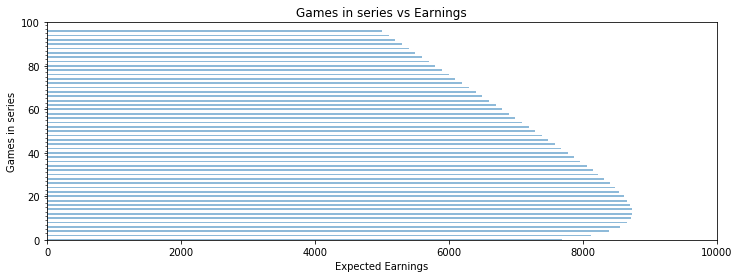

In [409]:
optimal_series(0.7)

Given my calculations, 15 games is the optimal series length.

### [25 points] Problem 5
***

The card game "War" is fun for small children. The basic rules are [here](https://www.bicyclecards.com/how-to-play/war/), but see the list below. Assume that the value of each card in the deck, in decreasing order, is A K Q J 10 9 8 7 6 5 4 3 2. For example, Q is of higher value than J. 

Create a simulation of the game War. Your simulation must:

- initialize a single deck of 52 standard cards, shuffled.
- deal half of those cards to each player.
- simulate the game of War between two players until one player has all 52 cards, while recording the number of rounds that have passed.
- for counting purposes, a round ends when the winner places cards on the bottom of their stack. 
- if a player runs out of cards mid-War, that player loses. 
- when cards are collected to be placed at the bottom of a deck, they are scraped from the table in a way that randomly shuffles them.  

**Part A**: For any fixed order of the cards, the game is completely non-random. This means that shuffling the deck randomly makes the duration of the game a random variable. Use your simulation to compute the expected value of the duration of a game of war. 

**Part B**: What happens to the expected duration if the K, Q, and J cards are all now assumed to have _equal_ rank?

**Part C**: Suppose that before the game starts, Player 1 gives all of their 2s and 3s to Player 2, and Player 2 gives all their As and Ks to Player 1. Does this tend to make the game longer or shorter?